# <center> Basic epidemic models

## Helpers

In [30]:
import matplotlib.pyplot as plt

In [68]:
def peak(L):
    for i in range(len(L)):
        if L[i+1]<L[i]:
            return i
    return "no peak"

## SIR model

In this first approach, we consider three types of people:

- the __susceptible__ people: they are not immune thus they are likely to be infected
- the __infected__ people: they carry the virus and can infect the susceptible people
- the __recovered__ people: they've already been infected and then they recovered or died. Either case, they can't get infected anymore.

The ODE that we need to solve are as follow:

$$
\left\{
\begin{array}{r c l}
S'(t) & = & -pS(t)I(t) \\
I'(t) & = & pS(t)I(t) - I(t)/d \\
R'(t) & = & I(t)/d
\end{array}
\right.
$$

Where:

- *p* is the __infection rate__: depends on the number of contact between infected and susceptible people, and the probability for a contact to be contagious.
- *d* is the __contagiousness duration__: the number of days people stay contagious.

In [73]:
def SIR(I0, rho, c, d, T):
    p = rho*c # Infection rate
    S, I, R = 1-I0, I0, 0
    S_list, I_list, R_list = [S], [I], [R]
    for i in range(T):
        S, I, R = S - p*S*I, I + p*S*I - I/d, R + I/d
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
    return S_list, I_list, R_list

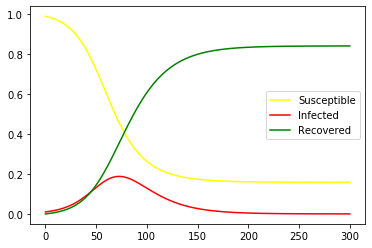

Cumulative number of infected people: 84.1%
Duration before the peak: 73


In [75]:
I0 = .01 # Initial number of infected people
rho = .04 # Probabibility of contagion for an interaction
c = 3 # Number of contacts per people per day
d = 18 # Contagiousness duration (days) 
T = 300 # Study duration (days)

S_list, I_list, R_list = SIR(I0, rho, c, d, T)

plt.plot(S_list, label='Susceptible', color='yellow')
plt.plot(I_list, label='Infected', color='red')
plt.plot(R_list, label='Recovered', color='green')
plt.legend()
plt.show()

print("Cumulative number of infected people: {}%".format(round(100*R_list[-1], 1)))
print("Duration before the peak: {}".format(peak(I_list)))

## SEIR model

In this second approach, we consider three types of people:

- the __susceptible__ people: they are not immune thus they are likely to be infected
- the __exposed__ people: they carry the virus but they don't have any symptoms
- the __infected__ people: they carry the virus and can infect the susceptible people, but they know thay are sick as they are enough advanced to have symptoms
- the __recovered__ people: they've already been infected and then they recovered or died. Either case, they can't get infected anymore.

The ODE that we need to solve are as follow:

$$
\left\{
\begin{array}{r c l}
S'(t) & = & -p_eS(t)E(t) - p_iS(t)I(t) \\
E'(t) & = & p_eS(t)E(t) + p_iS(t)I(t) - E(t)/d_e \\
I'(t) & = & E(t)/d_e - I(t)/d_i \\
R'(t) & = & I(t)/d_i
\end{array}
\right.
$$

Where:

- $p_e$ is the __exposition rate__: depends on the number of contact between exposed and susceptible people, and the probability for a contact to be contagious.
- $p_i$ is the __infection rate__: depends on the number of contact between infected and susceptible people, and the probability for a contact to be contagious.
- $d_e$ is the __exposition duration__: the number of days people stay contagious without any symptom.
- $d_i$ is the __infection duration__: the number of days people stay contagious with symptoms.

In [76]:
def SEIR(E0, I0, rho_e, rho_i, c_e, c_i, de, di, T):
    pe = rho_e*c_e # Exposition rate
    pi = rho_i*c_i # Infection rate
    S, E, I, R = 1-E0-I0, E0, I0, 0
    S_list, E_list, I_list, R_list = [S], [E], [I], [R]
    for i in range(T):
        S, E, I, R = S - pe*S*E - pi*S*I, E + pe*S*E + pi*S*I - E/de, I + E/de - I/di, R + I/di
        S_list.append(S)
        E_list.append(E)
        I_list.append(I)
        R_list.append(R)
    return S_list, E_list, I_list, R_list

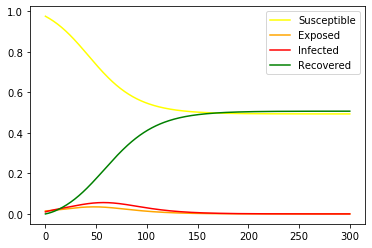

Cumulative number of infected people: 0.5067377147705904
Duration before the peak: 57


In [77]:
E0 = .015 # Initial number of exposed people
I0 = .01 # Initial number of infected people
rho_e = .04 # Probabibility of contagion for an interaction
rho_i = .04 # Probabibility of contagion for an interaction
c_e = 4 # Number of contacts per people per day
c_i = 1 # Number of contacts per people per day
de = 6 # Exposition duration (days)
di = 10 # Infection duration (days)
T = 300 # Study duration (days)

S_list, E_list, I_list, R_list = SEIR(E0, I0, rho_e, rho_i, c_e, c_i, de, di, T)

plt.plot(S_list, label='Susceptible', color='yellow')
plt.plot(E_list, label='Exposed', color='orange')
plt.plot(I_list, label='Infected', color='red')
plt.plot(R_list, label='Recovered', color='green')
plt.legend()
plt.show()

print("Cumulative number of infected people: {}".format(R_list[-1]))
print("Duration before the peak: {}".format(peak(I_list)))

In [ ]:
scacsdSAcscsc